## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_context('notebook',font_scale=1.4)
import warnings 
warnings.filterwarnings('ignore')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [529]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [530]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [531]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [532]:
dataset.shape

(891, 12)

In [533]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [534]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки: Даний датасет містить інформацію про пасажирів Титаніка, де виживші позначені як 1, а загиблі - як 0. На борту були три класи кабін, що чітко відображається у виведенні останніх п'яти атрибутів.
Після транспонування видно, що наймолодшому пасажиру було пів рочку, а найстаршому - 80. Також помітно, що кореляція відхилення у колонці "Fare" становить 49, що свідчить про значну варіативність цін на квитки.
У наборі даних маємо 891 рядок і 12 колонок. Також можна помітити, що у колонці "Cabin" відсутні дані щодо кабін у 77,1% випадків тому її можна видалити з датасету. Також відсутні дані про вік у 19,87% випадків у колонці "Age", а також відомості про місце посадки для двох  у колонці "Embarked".

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



<Axes: >

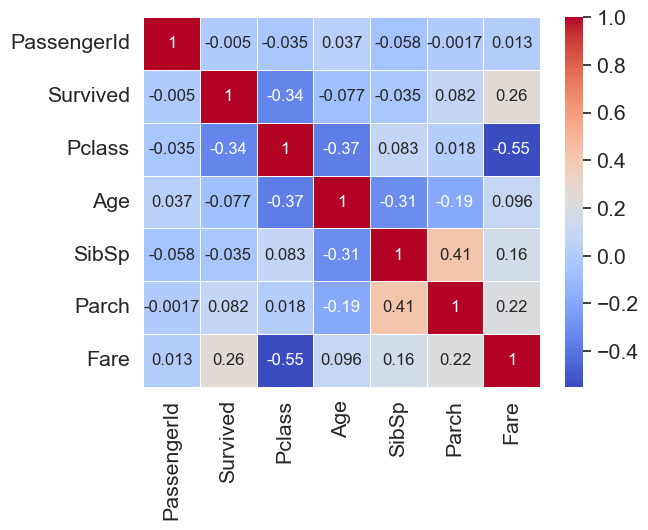

In [535]:
corelation_matrix = dataset.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
sns.heatmap(corelation_matrix, annot=True,cmap='coolwarm',linewidths=0.4, annot_kws={"size": 12})

Ваші висновки:За даними результатами можна побачити залежність між шансом на виживання  та класом каюти пасажира також на виживання вплинула колонка 'Fare' де написано про ціну білету.Додатково, кількість родичів, які подорожували разом з пасажиром, вплинула на його вибір класу каюти, що може пояснити частково зазначену залежність між цими факторами та виживанням.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [536]:
def fill_in_blanks(df,column_name, grouped_columns):
    df[column_name].fillna(df.groupby(grouped_columns)[column_name].transform('mean'), inplace=True)
    return df
fill_in_blanks(dataset,'Age',['Embarked'])
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [537]:
freq_port = dataset.Embarked.dropna().mode()[0]
freq_port

'S'

In [538]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Ваші висновки:Ми вже заповнили пропущені значення в колонці "Age", проте залишилося ще два пропущених поля в інших колонках. Для цих пропущених значень ми вирішили використати найчастіше зустрічаючеся значення відповідної колонки, щоб забезпечити повноту даних та уникнути втрати інформації.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





In [539]:
category = pd.cut(dataset.Age, bins=5, labels=['0','1','2','3','4'])
dataset.insert(5,"Age_bin",category)

In [540]:
dataset.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age_bin,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
760,761,0,3,"Garfirth, Mr. John",male,1,29.445397,0,0,358585,14.5000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,0,14.000000,1,0,2651,11.2417,NaN,C
463,464,0,2,"Milling, Mr. Jacob Christian",male,2,48.000000,0,0,234360,13.0000,NaN,S
128,129,1,3,"Peter, Miss. Anna",female,1,30.814769,1,1,2668,22.3583,F E69,C
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,1,29.445397,1,0,17464,51.8625,D21,S
181,182,0,2,"Pernot, Mr. Rene",male,1,30.814769,0,0,SC/PARIS 2131,15.0500,NaN,C
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,1,28.089286,0,0,330909,7.6292,NaN,Q
842,843,1,1,"Serepeca, Miss. Augusta",female,1,30.000000,0,0,113798,31.0000,NaN,C
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,0,5.000000,0,0,364516,12.4750,NaN,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,2,48.000000,1,2,220845,65.0000,NaN,S


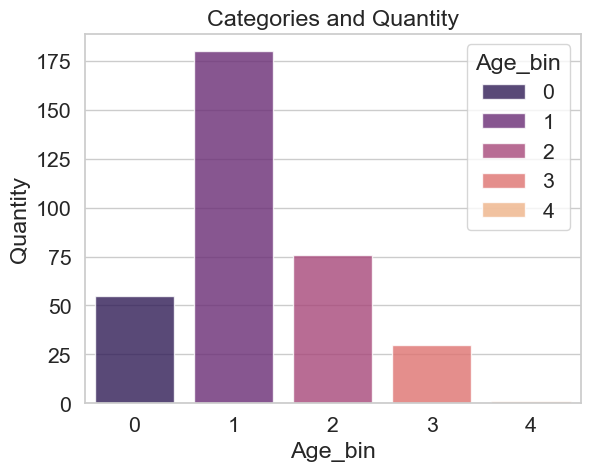

In [541]:
sns.countplot(data=dataset[dataset['Survived'] == 1], x='Age_bin',palette='magma', hue='Age_bin',alpha=0.8, legend=True)
plt.title('Categories and Quantity')
plt.ylabel('Quantity')
plt.show()

Ваші висновки: Ми вирішили створити нову колонку "Age_bin", в якій вік кожного пасажира поділений на категорії .З графіку ми бачимо що більшість пасажирів на кораблі входили до  першої категрії.Це свідчить про те, що середній вік пасажирів на кораблі був у молодшому діапазоні

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [542]:
scale = pd.qcut(dataset.Fare, 4)
survival_percentage = dataset.groupby(scale)['Survived'].mean()
print(survival_percentage)

Fare
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64


Ваші висновки:За даними видно, що кількість виживших зростає разом зі зростанням квартильного значення "Fare".\
В діапазоні (-0.001, 7.91] відсоток виживання 19.37%\
в діапазоні (7.91, 14.454] відсоток виживання 30%\
в діапазоні (14.454, 31.0] відсоток складає 45%\
Найвищий відсоток виживших (близько 58.1%) спостерігається у діапазоні (31.0, 512.329].
це свідчить про те що кількість виживших пасажирів сильно відрізняється в різних категоріях.Отже, ```використання кодування на цю змінну може бути доцільним``` 

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [543]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']
dataset['Alone'] = (dataset['Family_size'] ==0).astype(int)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_bin,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,2,35.0,0,0,373450,8.0500,NaN,S,0,1


<Axes: xlabel='Family_size', ylabel='count'>

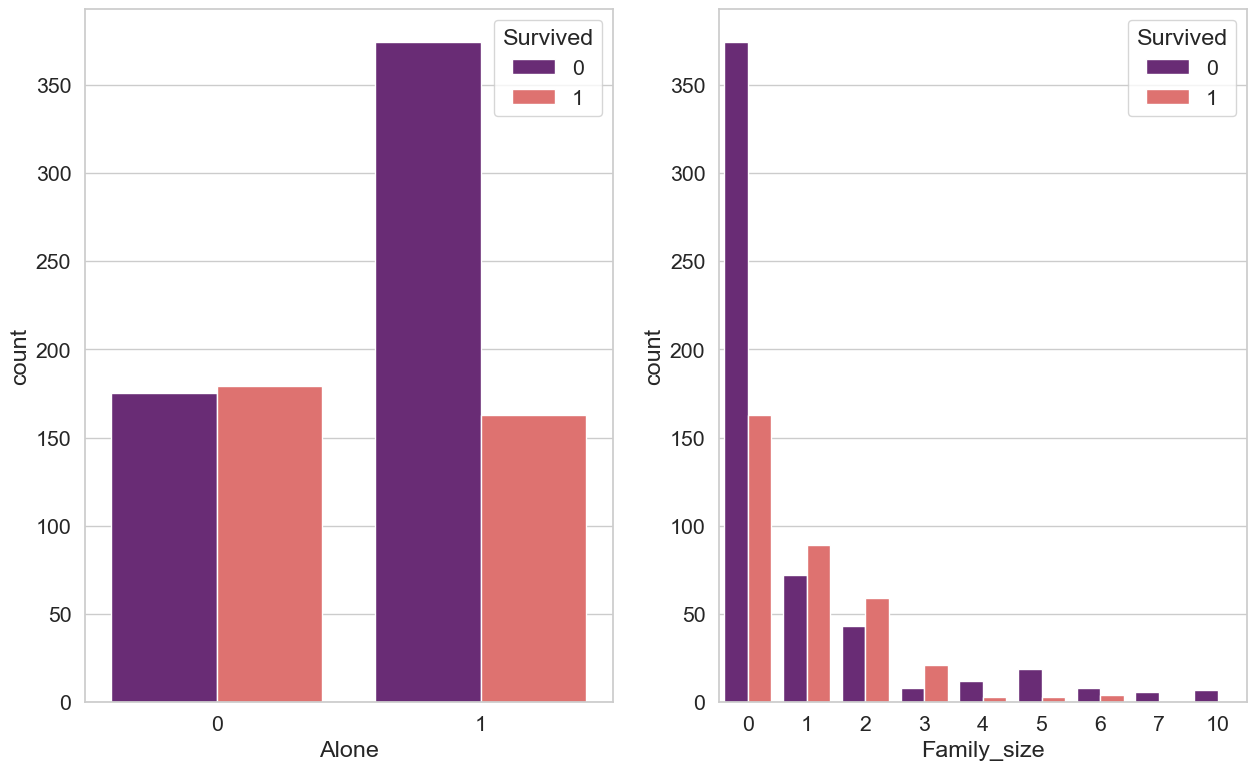

In [544]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 9))
sns.countplot(dataset, x='Alone' ,palette='magma', hue='Survived', ax=axes[0])
sns.countplot(dataset, x='Family_size' ,palette='magma' , hue='Survived', ax=axes[1])


Ваші висновки: З даного аналізу можна зрозуміти  що близько 60% осіб подорожували без сім'ї.Далі, аналізуючи відношення між кількістю членів сім'ї та виживанням, помічено цікаву тенденцію на правому графіку. Виявлено, що кількість виживших пасажирів зростає , якщо в сім'ї було від 1 до 3 дітей.Це може говорити про те ,що пасажири з невеликою сім'єю мали більше шансів на виживання

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [545]:
dataset = dataset.drop(['Cabin','Parch','SibSp','Ticket'],axis=1)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age_bin,Age,Fare,Embarked,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.000000,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,38.000000,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,26.000000,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,35.000000,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,2,35.000000,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.000000,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,19.000000,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,29.445397,23.4500,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.000000,30.0000,C,0,1


Ваші висновки: \
1.Cabin ми видаляємо бо там забагато пропущених даних\
2.Parch та SibSp ми видаляємо оскільки ми вже створили стовпчик family_zise , який передає суму змінних\
3.Ticket ми видаляємо оськільки це не релеванті дані для подальшого аналізу.\


***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [546]:
dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})
dataset['Embarked'] = dataset['Embarked'].replace({'S':0,'C':1,'Q':2}).astype(int)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age_bin,Age,Fare,Embarked,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,1,22.000000,7.2500,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,38.000000,71.2833,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,26.000000,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,35.000000,53.1000,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,2,35.000000,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1,27.000000,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,19.000000,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,29.445397,23.4500,0,3,0
889,890,1,1,"Behr, Mr. Karl Howell",1,1,26.000000,30.0000,1,0,1


In [547]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(dataset['Title'].unique())
print(dataset['Title'].value_counts())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [548]:
dataset['Title'] = dataset['Title'].replace(['Dr','Rev','Mlle','Major','Col','Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer'], 'Other')
dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.792000
4,Other,0.444444


In [549]:
dataset['Title'] = dataset['Title'].replace({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4})
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age_bin,Age,Fare,Embarked,Family_size,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,22.000000,7.2500,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,38.000000,71.2833,1,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1,26.000000,7.9250,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,35.000000,53.1000,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",1,2,35.000000,8.0500,0,0,1,0
5,6,0,3,"Moran, Mr. James",1,1,28.089286,8.4583,2,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,3,54.000000,51.8625,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0,2.000000,21.0750,0,4,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,27.000000,11.1333,0,2,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,14.000000,30.0708,1,1,0,1


In [550]:
dataset = dataset.drop(['Name'], axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age_bin,Age,Fare,Embarked,Family_size,Alone,Title
0,1,0,3,1,1,22.0,7.2500,0,1,0,0
1,2,1,1,0,2,38.0,71.2833,1,1,0,1
2,3,1,3,0,1,26.0,7.9250,0,0,1,2
3,4,1,1,0,2,35.0,53.1000,0,1,0,1
4,5,0,3,1,2,35.0,8.0500,0,0,1,0


Ваші висновки:\
Перетворила колонки "Sex" та "Embarked"  в категоріальні змінні для полегшення обробки. Нова колонка "Title" була створена на основі приставок до імен, таких як "Mr", "Mrs", і використовується для вилучення корисної інформації зі стовпця "Name". Рідкісні значення в "Title" були замінені позначкою "Other", що спрощує аналіз. Колонка "Name" була видалена, оскільки інформація з неї вже міститься в новій колонці "Title", та вона стала зайвою.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



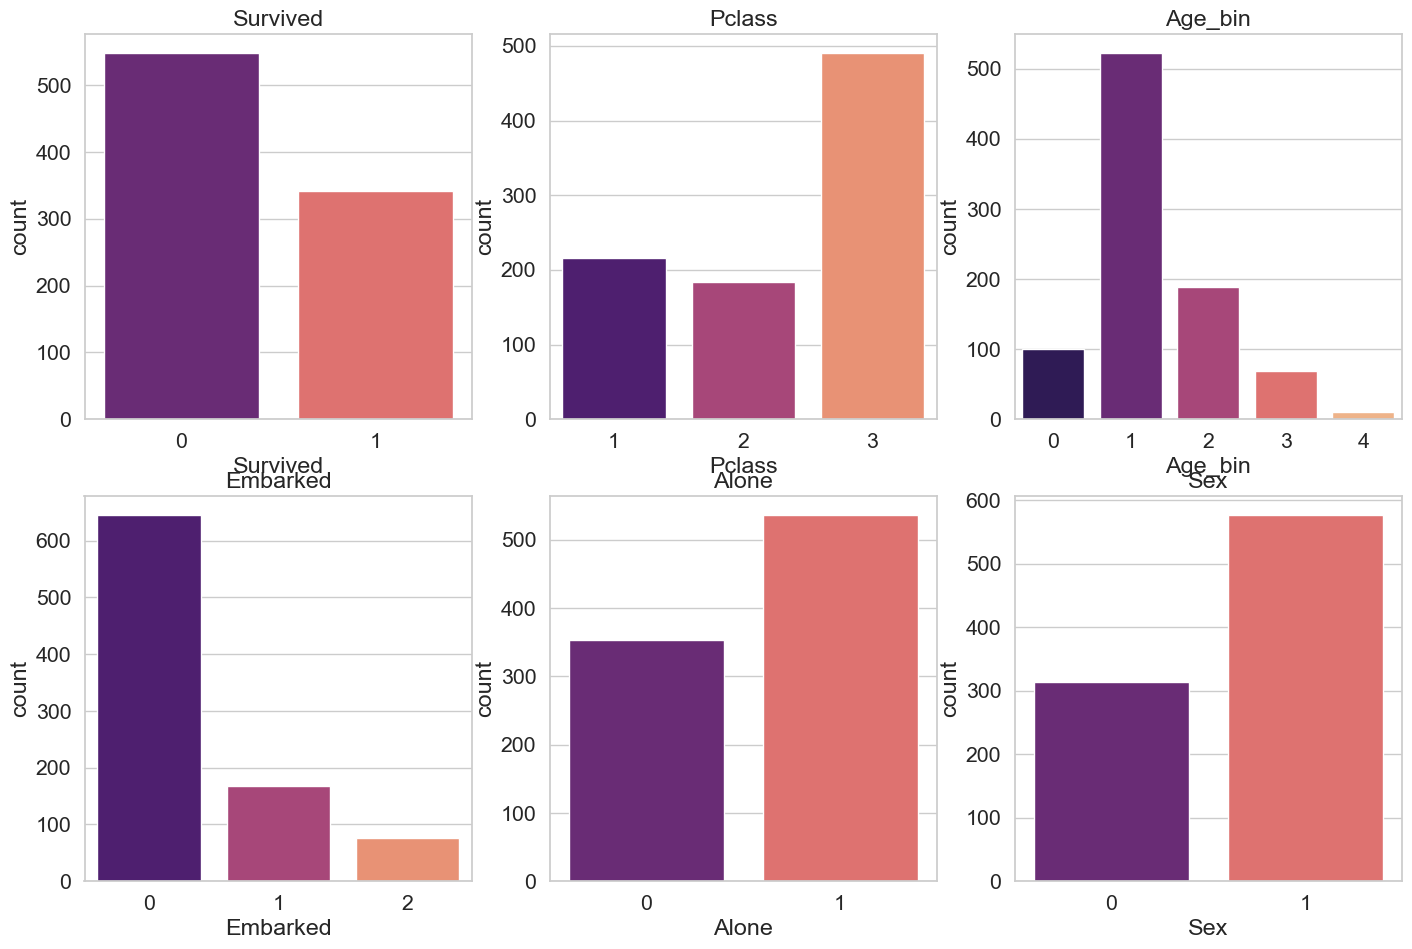

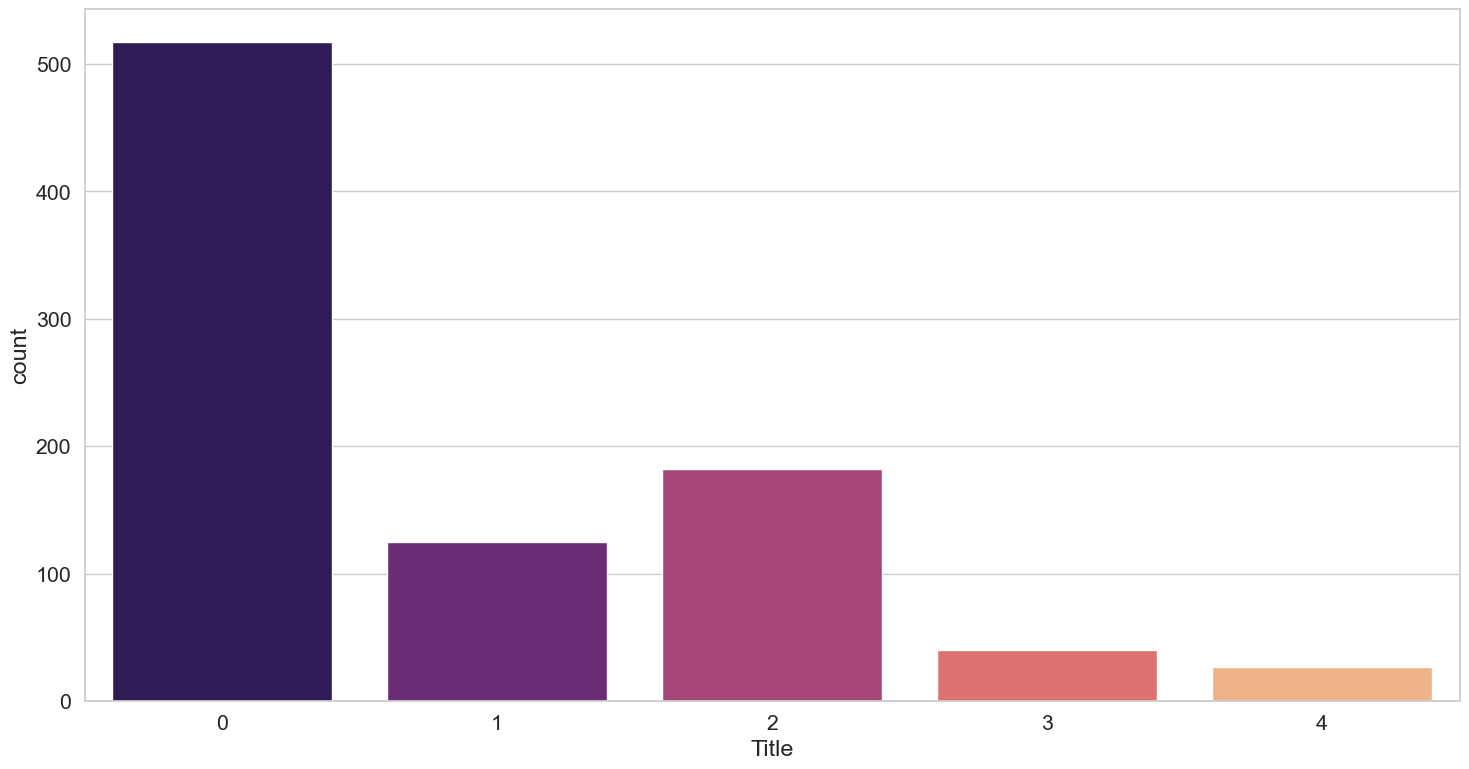

In [551]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(17, 11))
plot_vars = ['Survived', 'Pclass', 'Age_bin','Embarked','Alone','Sex']
palette = 'magma'
for i, var in enumerate(plot_vars):
    row = i // 3
    col = i % 3
    sns.countplot(data=dataset, x=var, palette=palette, ax=axes[row, col])
    axes[row, col].set_title(var)
fig, axes = plt.subplots(ncols=1, figsize=(15, 8))
sns.countplot(dataset,x='Title', palette='magma', ax=axes)
plt.tight_layout()
plt.show()


Ваші висновки: На даній сітці представлено 7 графіків, які описують такі характеристики, як вік (Age), вік у категоріях (Age_bin), стать (Sex), клас квитка (Pclass) та інші. Дані на графіках виглядають чіткими та інформативними, що робить їх придатними для подальшого аналізу.\
При об'єднанні цих даних можна виявити певні закономірності та залежності між змінними. Наприклад, можна побачити зв'язок між віком та класом квитка, або між статтю та ймовірністю виживання.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

Text(0.5, 1.0, 'Fare')

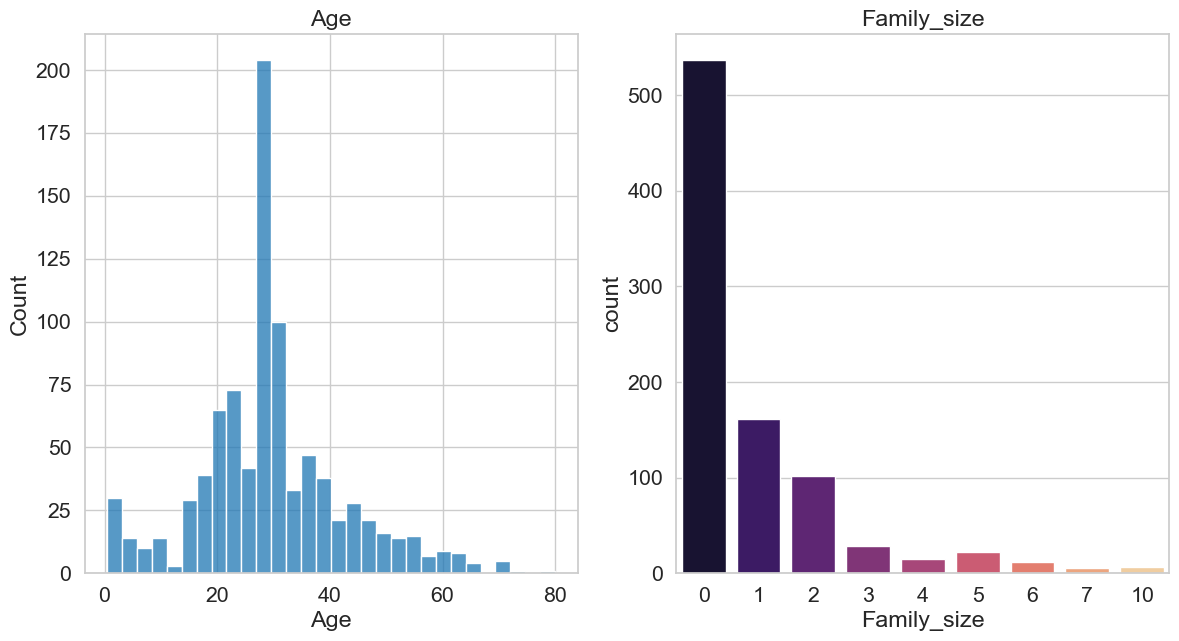

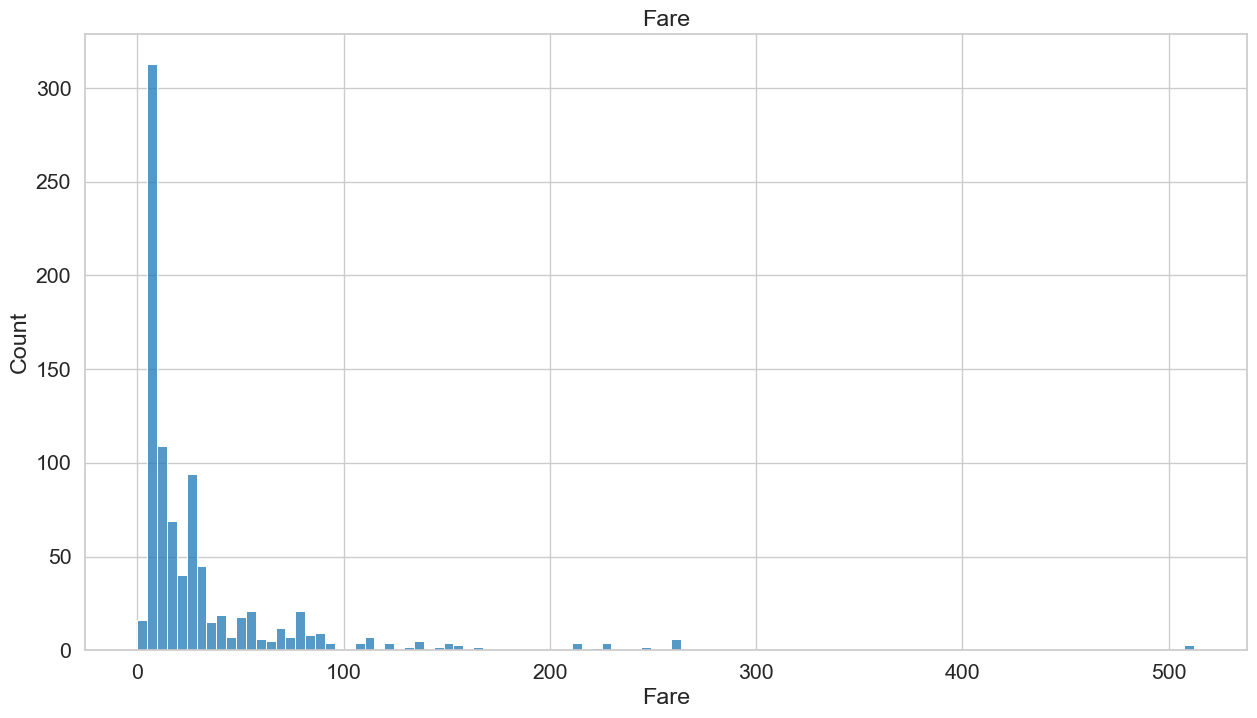

In [552]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 7))
palette = 'magma'
sns.histplot(dataset, x='Age', palette=palette, ax=axes[0])
axes[0].set_title('Age')
sns.countplot(dataset, x='Family_size', palette=palette, ax=axes[1])
axes[1].set_title('Family_size')
fig, axes = plt.subplots(ncols=1, figsize=(15, 8))
sns.histplot(dataset, x='Fare', palette=palette,ax=axes)
axes.set_title('Fare')

Ваші висновки:
Перший графік, що демонструє кількість людей за віком, має бімодальний розподіл. Це свідчить про те, що в двох вікових категоріях концентрація пасажирів була значно вища, ніж в інших.\
Графік розміру сім'ї (Family_size) чітко ілюструє геометричний розподіл. З нього стає зрозуміло, що переважна більшість пасажирів подорожували без сім'ї та дітей.\
На останньому графіку, де представлено розподіл цін на квитки (Fare), спостерігається експоненціальний розподіл.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

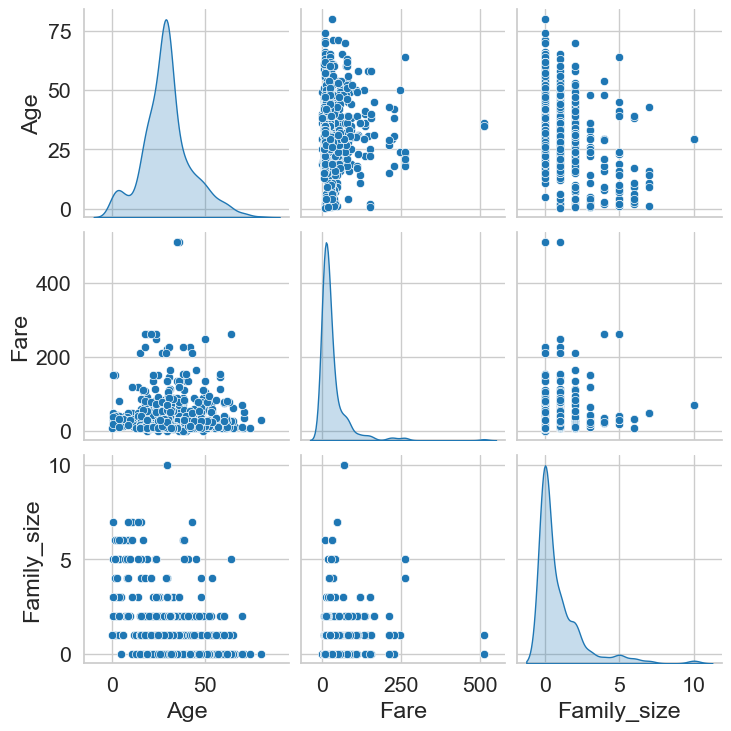

In [556]:
num_variables = dataset[['Age','Fare','Family_size']]
sns.pairplot(num_variables, diag_kind="kde", palette="husl")


Ваші висновки:
 На графіку, який показує зв'язок між ціною та віком, чітко видно  кореляцію. Це означає, що з віком ціна квитка, як правило, зростає.Також можна помітити кореляцію між віком та розміром сім'ї. Якщо говорити про викиди то На графіку, який показує розподіл віку, можна помітити декілька викидів. Ці викиди можуть бути пов'язані з помилками в даних або з тим, що в наборі даних присутні люди, які значно старші або молодші за більшість пасажирів.На графіку, який показує розподіл цін, також можна помітити декілька викидів. Ці викиди можуть бути пов'язані з помилками в даних або з тим, що в наборі даних присутні квитки, які значно дорожчі або дешеві за більшість квитків.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.